In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, io
from skimage.exposure import rescale_intensity
from skimage.transform import resize

In [2]:
# fashion mnist is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# load data
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
train_images.shape, train_labels.shape  #(no. of images ,w,h,no. of channels)

((60000, 28, 28), (60000,))

In [17]:
#For reshape the data we need to add third dimensions i.e changing from (60000,28,28) to (60000,28,28,1)

img_rows=train_images[0].shape[0]
img_cols=test_images[0].shape[1]

train_images=train_images.reshape(train_images.shape[0],img_rows,img_cols,1)

test_images=test_images.reshape(test_images.shape[0],img_rows,img_cols,1)

In [19]:
train_images.shape 

(60000, 28, 28, 1)

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# reshape labels to make 1d array # it kind of transpose the shape of the array
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

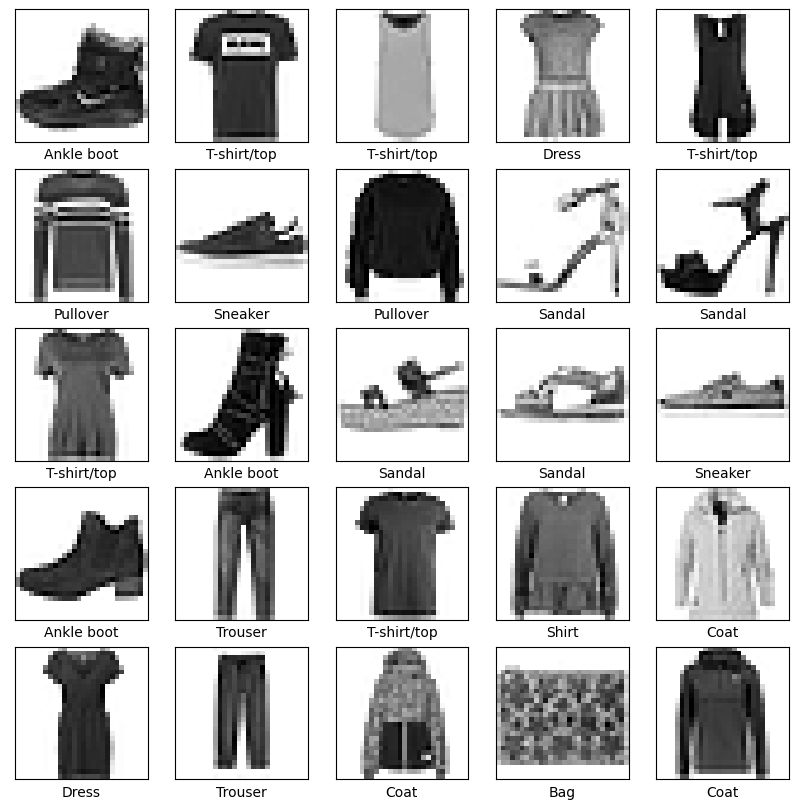

In [9]:
# plot first 25 images 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create CNN Architecture

In [20]:
# Setup Architecture Base Model

model = Sequential()
################################### Feature Extraction Layers ###########################
# convolution + relu layer   
model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_images[0].shape)) 

# pooling layer
model.add(MaxPooling2D((2,2)))

################################# Classification Layers #################################
# Flatten creates one-dimentional array by "flattening" 2-dimentional array
model.add(Flatten())

# create fully connected Dense layer , it will do the classification
model.add(Dense(64, activation='relu'))

# create output layer (in the output layer, we have to specify the number of neurons how many labels we have in dataset.
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

In [21]:
# Compile Model
# to compile a model, we have to specify optimizer, loss and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy for loss is required becasue we have multiclass classification model
              metrics=['accuracy'])

In [24]:
# Fit Model 
with tf.device('/GPU:0'):
    results = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.4216 - accuracy: 0.8506 - val_loss: 0.3325 - val_accuracy: 0.8822
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2846 - accuracy: 0.8983 - val_loss: 0.2959 - val_accuracy: 0.8938
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2404 - accuracy: 0.9134 - val_loss: 0.2825 - val_accuracy: 0.8959
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2109 - accuracy: 0.9229 - val_loss: 0.2654 - val_accuracy: 0.9041
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1850 - accuracy: 0.9324 - val_loss: 0.2631 - val_accuracy: 0.9050
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1638 - accuracy: 0.9394 - val_loss: 0.2680 - val_accuracy: 0.9084
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1434 - accuracy: 0.9466 - val_loss: 0.2506 -

In [25]:
# history from 10 epochs that were ran by a model (loss, accuracy, validation loss, validation accuracy)
results.history

{'loss': [0.4216185510158539,
  0.28457027673721313,
  0.2404010146856308,
  0.21092981100082397,
  0.18499962985515594,
  0.1638256162405014,
  0.14338356256484985,
  0.12670350074768066,
  0.11100398749113083,
  0.09787687659263611],
 'accuracy': [0.8505833148956299,
  0.8982999920845032,
  0.9133999943733215,
  0.9229166507720947,
  0.932366669178009,
  0.939383327960968,
  0.9465833306312561,
  0.9525166749954224,
  0.9595833420753479,
  0.9640666842460632],
 'val_loss': [0.33247652649879456,
  0.2958795726299286,
  0.2825280427932739,
  0.26538512110710144,
  0.2630521357059479,
  0.2680424451828003,
  0.25057896971702576,
  0.2938559353351593,
  0.2718219757080078,
  0.30170199275016785],
 'val_accuracy': [0.8822000026702881,
  0.8938000202178955,
  0.8959000110626221,
  0.9041000008583069,
  0.9049999713897705,
  0.9083999991416931,
  0.9153000116348267,
  0.9065999984741211,
  0.9115999937057495,
  0.9110000133514404]}

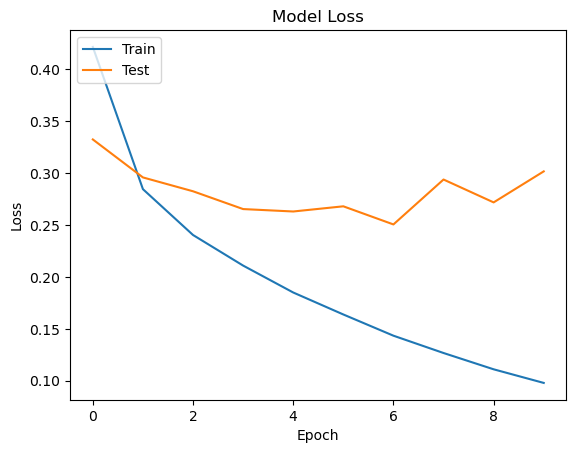

In [26]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

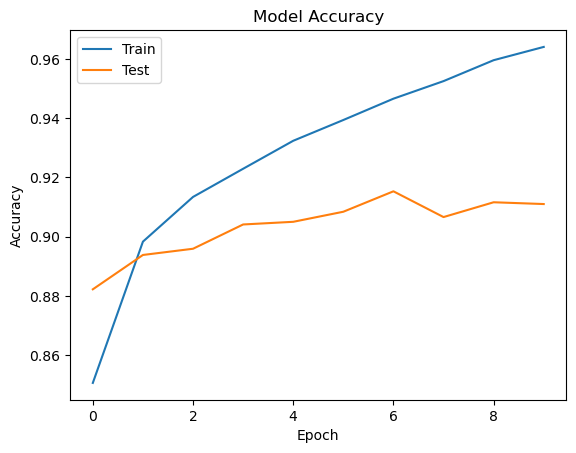

In [27]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [28]:
# Evaluate Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.3017 - accuracy: 0.9110 - 2s/epoch - 7ms/step


In [29]:
# predictions are probability distributions between 0 and 1 (because of softmax)
pred = model.predict(test_images)

pred

313/313 [==============================] - 2s 7ms/step


array([[3.7604014e-08, 1.2612131e-09, 2.5302096e-09, ..., 4.3265038e-04,
        8.9848018e-10, 9.9956721e-01],
       [9.3742365e-06, 7.3724063e-21, 9.9999022e-01, ..., 7.5155935e-13,
        6.9946849e-14, 7.1276078e-15],
       [6.1368882e-11, 1.0000000e+00, 1.2085481e-13, ..., 6.1810860e-17,
        1.7774838e-12, 1.5017169e-14],
       ...,
       [4.6314801e-12, 3.0621640e-14, 1.5491258e-11, ..., 2.0359070e-11,
        9.9999988e-01, 1.0825365e-16],
       [1.6057806e-11, 1.0000000e+00, 2.2279944e-11, ..., 7.2770803e-15,
        4.2473722e-15, 4.4242922e-11],
       [1.3113696e-04, 1.4010824e-05, 1.6736211e-02, ..., 4.5928952e-01,
        1.9111156e-01, 1.6769434e-03]], dtype=float32)

In [31]:
# we can convert predictions into labels by computing argmax for each 
pred_classes = [np.argmax(element) for element in pred]
pred_classes

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 6,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 4,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 2,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 4,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 2,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 6,
 5,
 6,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 2,


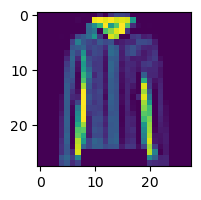

In [32]:
# true image (ship)
plt.figure(figsize=(2,2))
plt.imshow(test_images[6])

In [33]:
# predicted label
class_names[pred_classes[6]]

'Coat'

In [34]:
# compare true vs prediced
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.81      0.90      0.85      1000
           3       0.93      0.90      0.91      1000
           4       0.88      0.86      0.87      1000
           5       0.99      0.95      0.97      1000
           6       0.81      0.72      0.76      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
#The End :)